# Protein Folding Problem using Qiskit Nature
 We can solve the protein folding problem based on some steps:
 
 i.ProteinFoldingProblem function (preparing the Hamiltonian of the problem)<br>
 ii. VQE algorithm (finding the lowest energy conformation)<br>
 iii. visualyzing the result

In [1]:
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import MiyazawaJerniganInteraction
from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import ProteinFoldingProblem
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit import execute, Aer
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit.algorithms import VQE
from qiskit.utils import algorithm_globals, QuantumInstance
algorithm_globals.random_seed = 23

##  i.  ProteinFoldingProblem Function
We should prepare these steps to use them in `ProteinFoldingProblem` function:
1. Define a protein
2. Determine the interaction method
3. Determine the penalty terms

Then, we can get the operator of our problem.

In [2]:
### 1. Defining a protein
main_chain = "APRLRFY" #Alanine,Proline,Arginine,Leucine,Arginine,Phenylalanine,Tyrosine / 7 amino acids
side_chains = [""] * 7 # seven empty side chains = no side chains 
protein1 = Peptide(main_chain, side_chains)

### 2. The interaction method
mj_interaction = MiyazawaJerniganInteraction()

### 3. Penalty terms
penalty_params = PenaltyParameters(10,10,10) #(penalty_chiral, penalty_back, penalty_1)

### using ProteinFoldingProblem Function
protein_folding_1 = ProteinFoldingProblem(protein1, mj_interaction, penalty_params)
qubit_operator_1 = protein_folding_1.qubit_op()
print(qubit_operator_1)

1613.5895000000003 * IIIIIIIII
+ 487.5 * IIIIIIZII
- 192.5 * IIIIIIIZZ
+ 192.5 * IIIIIIZZZ
- 195.0 * IIIIZIZII
- 195.0 * IIIIIZIZI
- 195.0 * IIIIZZZZI
- 95.0 * IIZIZIIII
- 95.0 * IIIZIZIII
- 95.0 * IIZZZZIII
+ 295.0 * IIIIIIZZI
- 497.5 * IIIIZIIII
- 300.0 * IIIIZZIII
+ 195.0 * IIIIIIIIZ
+ 197.5 * IIIIIZIIZ
- 197.5 * IIIIZZIIZ
- 904.2875 * IZIIIIIII
- 295.0 * IZIIIIZII
- 197.5 * IZIIIIZZI
+ 302.5 * IZIIZIIII
+ 202.5 * IZIIZZIII
+ 100.0 * IZIIZIZII
+ 100.0 * IZIIIZIZI
+ 100.0 * IZIIZZZZI
- 200.0 * IZIIIIIIZ
+ 97.5 * IZIIIIIZZ
- 97.5 * IZIIIIZZZ
- 100.0 * IZIIIZIIZ
+ 100.0 * IZIIZZIIZ
+ 100.0 * IIIIIIIZI
- 100.0 * IIIIIZIII
+ 2.5 * IZIIIIIZI
- 2.5 * IZIIIZIII
+ 192.5 * IIZIIIIII
+ 95.0 * IIZZIIIII
+ 97.5 * IIZIIIZII
+ 97.5 * IIIZIIIZI
+ 97.5 * IIZZIIZZI
- 97.5 * IIIZIIIIZ
+ 97.5 * IIZZIIIIZ
+ 7.5 * IZZIIIIII
+ 5.0 * IZZZIIIII
+ 2.5 * IZZIIIZII
+ 2.5 * IZIZIIIZI
+ 2.5 * IZZZIIZZI
- 2.5 * IZZIZIIII
- 2.5 * IZIZIZIII
- 2.5 * IZZZZZIII
- 2.5 * IZIZIIIIZ
+ 2.5 * IZZZIIIIZ
+ 105.0 * IIIZIIIII
-

## ii. VQE algorithm

Now, we should define these parts:

1. ansatz
2. optimizer
3. backend
4. callback function
5. expectation

The first three are mandatory but the last two are optional.

In [3]:
### 1. ansatz
ansatz = RealAmplitudes(reps=1)

### 2. optimizer
optimizer = COBYLA(maxiter=100)

### 3. backend
backend = "aer_simulator"
quantum_instance = QuantumInstance(
    Aer.get_backend(backend),
    shots=8192,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)


### 4. callback function
counts = []
values = []

def callback_function(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)
    
    
### 5. expectation
cvar_expectation = CVaRExpectation(0.1, PauliExpectation())

### VQE using CVaR
vqe = VQE(
    expectation=cvar_expectation,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=quantum_instance,
    callback=callback_function,
)

result = vqe.compute_minimum_eigenvalue(qubit_operator_1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 100,
    'eigenstate': {   '000000000': 0.02209708691207961,
                      '000000001': 0.046875,
                      '000000010': 0.029231698334171417,
                      '000000011': 0.08486547258750168,
                      '000000101': 0.07733980419227864,
                      '000000110': 0.019136638615493577,
                      '000001010': 0.015625,
                      '000001011': 0.027063293868263706,
                      '000001101': 0.015625,
                      '000001111': 0.015625,
                      '000010001': 0.011048543456039806,
                      '000010010': 0.011048543456039806,
                      '000010011': 0.029231698334171417,
                      '000010101': 0.015625,
                      '000011000': 0.019136638615493577,
                      '000011001': 0.02209708691207961,
                      '000011010': 0.034938562148434216,
                      '00

## iii. Visualyzing 

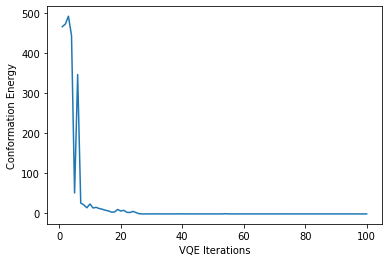

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

plt.show()

In [5]:
interpreted_result = protein_folding_1.interpret(raw_result=result)
print(f"The folded protein's main sequence of turns is: {interpreted_result.protein_shape_decoder.main_turns}")
print(f"and the side turn sequences are: {interpreted_result.protein_shape_decoder.side_turns}")

The folded protein's main sequence of turns is: [1, 0, 3, 2, 0, 3]
and the side turn sequences are: [None, None, None, None, None, None, None]


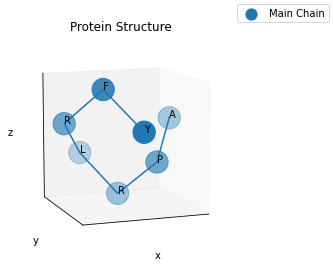

In [6]:
fig = interpreted_result.get_figure(title="Protein Structure", ticks=False, grid=True)
fig.get_axes()[0].view_init(10, 70)

In [7]:
import qiskit
versions = qiskit.__qiskit_version__
print("The version of Qiskit is",versions['qiskit'])
print()
print("The version of each component:")
for key in versions:
    print(key,"->",versions[key])

The version of Qiskit is 0.37.1

The version of each component:
qiskit-terra -> 0.21.1
qiskit-aer -> 0.10.4
qiskit-ignis -> None
qiskit-ibmq-provider -> 0.19.2
qiskit -> 0.37.1
qiskit-nature -> 0.4.4
qiskit-finance -> None
qiskit-optimization -> None
qiskit-machine-learning -> None
